In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score/Loan_ETL.csv


In [2]:
ds = pd.read_csv('/kaggle/input/credit-score/Loan_ETL.csv')

In [3]:
ds['TARGET'] = ds['TARGET'].astype('category')
X = ds.drop("TARGET", axis=1).values
y = ds["TARGET"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023) 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

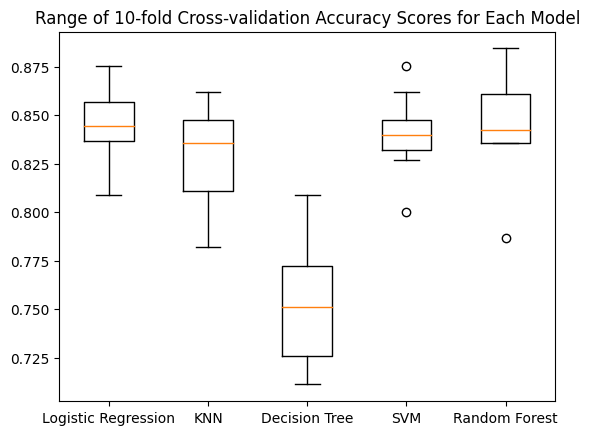

In [4]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
          "Decision Tree": DecisionTreeClassifier(), "SVM": svm.SVC(),
         "Random Forest": RandomForestClassifier()} 
results = [] 
for model in models.values(): 
    kf = KFold(n_splits = 10, random_state = 2023, shuffle=True) 
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf) 
    results.append(cv_results) 
plt.boxplot(results, labels=models.keys())
plt.title("Range of 10-fold Cross-validation Accuracy Scores for Each Model")
plt.show()

In [5]:
for name, model in models.items(): 
    model.fit(X_train_scaled, y_train) 
    test_score = model.score(X_test_scaled, y_test) 
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.824
KNN Test Set Accuracy: 0.8066666666666666
Decision Tree Test Set Accuracy: 0.7626666666666667
SVM Test Set Accuracy: 0.8173333333333334
Random Forest Test Set Accuracy: 0.8093333333333333


Logistic Regression performs best for this problem if we are using accuracy as the metric.

In [6]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict_proba(X_test_scaled)
predictions

array([[0.81825109, 0.18174891],
       [0.87272417, 0.12727583],
       [0.74038258, 0.25961742],
       ...,
       [0.77145433, 0.22854567],
       [0.76922965, 0.23077035],
       [0.88053643, 0.11946357]])

In [7]:
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(model.predict(X_test_scaled), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,0,0.818251,0.181749,0
1,0,0.872724,0.127276,0
2,1,0.740383,0.259617,0
3,0,0.857808,0.142192,0
4,0,0.736159,0.263841,0


In [8]:
#dfx.to_csv('/kaggle/input/credit-score/model.csv', sep=',', encoding='UTF-8')
